###### <img src = 'images/sklearn-workflow-title.png'>

<img src = 'images/sk-learn_agenda.png'>

<img src = 'images/sklearn-intro-jupyter-notebook-header.png'>

## 0. An end-to-end Scikit-Learn workflow

In [1]:
# 1. Get the data ready 

import pandas as pd

heart_disease = pd.read_csv("./../data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
#create x (features matrix) - input
x = heart_disease.drop('target',axis=1)

# create y (labels) - output
y = heart_disease['target']

In [3]:
# 2. choosing the right right model and the hyper parameter problem

# this is classification problem and we will use Random forest 
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# we will keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
# 3. fit the model to the training data

from sklearn.model_selection import train_test_split

# split the data
# 80% training data and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [5]:
# training the model
clf.fit(x_train,y_train);

In [6]:
# making pridiction 
y_preds = clf.predict(x_test)
y_preds

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0])

In [7]:
y_test

144    1
262    0
126    1
75     1
270    0
      ..
260    0
183    0
6      1
68     1
209    0
Name: target, Length: 61, dtype: int64

In [8]:
# 4. evaluting the model on the training data and test data

#checking on the training data; 
clf.score(x_train,y_train)
# so it comes 100% of the data it has already seen this data

1.0

In [9]:
#checking it with test data to get the actual score
clf.score(x_test,y_test)

0.7049180327868853

In [10]:
# these are some additional matrics to look at other than just the above score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67        30
           1       0.68      0.81      0.74        31

    accuracy                           0.70        61
   macro avg       0.71      0.70      0.70        61
weighted avg       0.71      0.70      0.70        61



In [11]:
confusion_matrix(y_test,y_preds)

array([[18, 12],
       [ 6, 25]])

In [12]:
accuracy_score(y_test,y_preds)

0.7049180327868853

In [13]:
# 5. improve a model
# try different amount of n_estimators 
# how many estimators are best for our model
import numpy as np
np.random.seed(42)

for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"Model accuracy on test set: {clf.score(x_test,y_test) * 100:0.2f}%")
    print(" ")


Trying model with 10 estimators...
Model accuracy on test set: 68.85%
 
Trying model with 20 estimators...
Model accuracy on test set: 68.85%
 
Trying model with 30 estimators...
Model accuracy on test set: 68.85%
 
Trying model with 40 estimators...
Model accuracy on test set: 67.21%
 
Trying model with 50 estimators...
Model accuracy on test set: 65.57%
 
Trying model with 60 estimators...
Model accuracy on test set: 65.57%
 
Trying model with 70 estimators...
Model accuracy on test set: 72.13%
 
Trying model with 80 estimators...
Model accuracy on test set: 73.77%
 
Trying model with 90 estimators...
Model accuracy on test set: 70.49%
 


In [14]:
# 6. save a model and load it
import pickle

pickle.dump(clf,open("random_forest_model_1.pkl","wb"))

In [15]:
# loading a saved model
loaded_model = pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(x_test,y_test)

# the accuracy matches with the last one from the loop

0.7049180327868853

In [16]:
# standard imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Getting the data ready to be used with ML

Three steps process 
 1. Split the data into features and labels(usually x and y)
 2. Filling (also called imputing) or disregarding missing values
 3. Converting non-numerical values to numerical values ( also called feature encoding)

In [17]:
heart_disease = pd.read_csv("./../data/heart-disease.csv")

In [18]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
# this is the feature dataframe 
x = heart_disease.drop("target",axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [20]:
# the target dataframe

y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [21]:
# spliting the data into training and test sets. 
from sklearn.model_selection import train_test_split

# 80% is the training and 20% is test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [22]:
x_train.shape, x_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [23]:
x.shape

(303, 13)

In [24]:
len(heart_disease)

303

### Data Preparation 
* Clean The Data - Avoid, Garbage and any missing values(imputation) 
* Transform The Data - Everything in same unit, text values to numerial values(feature encoding)
* Reducing Data - Training a huge data involves cost - so we can't train everything, sometime we have to reduce the size of the data that we want to train

### 1.1 Making sure everything is numerical  

In [25]:
car_sales = pd.read_csv('./../data/car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [26]:
len(car_sales)

1000

In [27]:
car_sales.dtypes

# so we will have encode the 'Make' and 'Colour' coloum to numerical.

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [28]:
# Let's try building the model without encoding

In [29]:
x = car_sales.drop("Price",axis=1)
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [30]:
y = car_sales['Price']

In [31]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [32]:
y.head()

0    15323
1    19943
2    28343
3    13434
4    14043
Name: Price, dtype: int64

In [33]:
# spliting into train and test sets
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [34]:
x_train.shape, x_test.shape,y_train.shape,y_test.shape

((800, 4), (200, 4), (800,), (200,))

In [35]:
# build machine learning model 
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

# this gives an value error, it can't deal with string. 

ValueError: could not convert string to float: 'Toyota'

In [36]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


#### Feature Encoding - Car Sales - Text to Numerial Values

In [37]:
# trun the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# defind the string columns 
# notice - door is a Categorical feature 
categorial_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorial_features)],
                               remainder="passthrough")
# finally transform 
transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [38]:
pd.DataFrame(transformed_x).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [39]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


### One Hot Encoding 

<img src = "images/one-hot-encoding.png">

In [40]:
len(x["Make"].unique()), len(x["Colour"].unique()),len(x["Doors"].unique())

(4, 5, 3)

In [41]:
# one more way of doing it - using Pandas

dummies = pd.get_dummies(car_sales[["Make",'Colour','Doors']])
dummies
# didn't work on the Doors feature 

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [42]:
# Let's refit the model

np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(transformed_x,y,test_size=0.2)

# model alreay created above - RandomForestRegressor 
model.fit(x_train,y_train)
model.score(x_test,y_test)

# it works 

0.3235867221569877

#### 1.2 Handling missing values
1. Fill them with some value(imputation). 
2. Remove the samples with missing data altogether. 

In [43]:
missing_car_sales = pd.read_csv('./../data/car-sales-extended-missing-data.csv')
missing_car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [44]:
# calculate the total missing values in each value 
missing_car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [45]:
# create x and y

x = missing_car_sales.drop('Price',axis=1)
y = missing_car_sales['Price']

In [46]:
# converting the data to numbers 

from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer

categorial_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()

transformer = ColumnTransformer([('one_hot',
                                 one_hot,
                                 categorial_features)],
                               remainder='passthrough')

transformed_x1 = transformer.fit_transform(missing_car_sales)
trans_missing_car = pd.DataFrame(transformed_x1)

In [47]:
trans_missing_car.head()

# what the fuck is this output 

# check the previous note - the new version of the sklearn doesn't give error when the
# input contains NaNs

# however I think the delow out is anyway not useable 

,0
0,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
1,"(0, 0)\t1.0\n (0, 6)\t1.0\n (0, 13)\t1.0\n..."
2,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
3,"(0, 3)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
4,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 11)\t1.0\n..."


#### Option-1: Fill missing data with Pandas 

In [48]:
# filling the 'Make'

missing_car_sales['Make'].fillna("Missing",inplace=True)

# fill the colour column 
missing_car_sales['Colour'].fillna("Missing",inplace=True)

#fill the Odometer 
missing_car_sales['Odometer (KM)'].fillna(missing_car_sales['Odometer (KM)'].mean(),inplace=True)

# fill the doors coloumn
missing_car_sales["Doors"].fillna(4,inplace=True)

In [49]:
missing_car_sales.isna().sum()
# except price, because this is what we want to predict 
# drop these 50 rows

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [50]:
# we remove the missing label (target variable)

missing_car_sales.dropna(inplace=True)

In [51]:
missing_car_sales.isna().sum()
# no missing values now

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [52]:
len(missing_car_sales)
# lost 50 rows

950

In [53]:
# now doing the feature encoding again

x = missing_car_sales.drop('Price',axis=1)
y = missing_car_sales['Price']

In [54]:
# converting the data to numbers 

from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer

categorial_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()

transformer = ColumnTransformer([('one_hot',
                                 one_hot,
                                 categorial_features)],
                               remainder='passthrough')

transformed_x1 = transformer.fit_transform(missing_car_sales)
pd.DataFrame(transformed_x1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0,4001.0


#### Option-2: Fill missing values with Sci-kit Learn

In [55]:
missing_car_sales = pd.read_csv("./../data/car-sales-extended-missing-data.csv")
missing_car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [56]:
missing_car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [57]:
# 1. Get rid of rows without price valuess

missing_car_sales.dropna(subset=['Price'],inplace=True)
missing_car_sales.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [58]:
# split into x & y 

x = missing_car_sales.drop('Price',axis=1)
y = missing_car_sales['Price']

x.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [59]:
# fill missing values with Sci-kit learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorial values with 'Missing' and numerial values with Mean
cat_imputer = SimpleImputer(strategy = 'constant',fill_value='Missing')
door_imputer = SimpleImputer(strategy='constant',fill_value=4)
num_imputer = SimpleImputer(strategy='mean')


# define columns

cat_features = ['Make','Colour']
door_feature = ['Doors']
num_features = ['Odometer (KM)']

# create an imputer ( somthing that fills missing data)

imputer = ColumnTransformer([
    ('cat_imputer',cat_imputer,cat_features),
    ('door_imputer',door_imputer,door_feature),
    ('num_imputer',num_imputer,num_features)
])

# transform the data
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [60]:
filled_car_sales = pd.DataFrame(filled_x,columns=['Make','Colour','Doors','Odometer (KM)'])


In [61]:
# no missing values

filled_car_sales.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [62]:
# converting the data to numbers 

from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer

categorial_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()

transformer = ColumnTransformer([('one_hot',
                                 one_hot,
                                 categorial_features)],
                               remainder='passthrough')

transformed_x1 = transformer.fit_transform(filled_car_sales)
transformed_x1

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [63]:
# now we have got our data as number with no missing value

# let's fit a model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test = train_test_split(transformed_x1,
                                                  y,
                                                  test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.2221112515179916

In [64]:
len(filled_car_sales), len(car_sales)

# less rows - low score - draw back
# earlier we had got ~30% accuracy 

(950, 1000)

## 2. Choosing the right estimator / algorithm for your problem

Some things to note:
    
    * Sklearn refers to machine learning models, algorithms as estimators.
    * Classification Problem - predicting a category (heart disearse or not)
    * Sometimes you'll see `clf` (short for classifier) used as a classification estimator
    * Regresssion Problem - predicting a number(selling price of the car)
    
    
Sklearn cheatsheet - https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

<img src = "images/sklearn-ml-map.png">

### 2.1 Picking a machine learning model for a regression problem

Let's use the California housing Price Dataset - Build into Sklearn package

In [65]:
# Get California housing dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [66]:
housing_df = pd.DataFrame(housing["data"],columns=housing['feature_names'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [67]:
housing_df['target'] = housing['target']
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#### Experimentation-01 RidgeRegression

In [68]:
# sklearn cheatsheet- "few feature should be important"??? - RidgeRegression

# experimentation-01

# Import algorithm/estimator 
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Setup random seed
np.random.seed(42)

# Create the data
x = housing_df.drop('target',axis=1) # features
y = housing_df['target'] # meadin house price in $100,000s

# Split the data into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Instantiate and fit the model (on the training set)

model = Ridge()
model.fit(x_train,y_train)
model.score(x_test,y_test)
# returns the coefficient of determinaiton - how strong liner relationship is
# between two variables - R-square

0.5758549611440125

#### Experimentation-02 SVM - SVR - Linear - Don't Run

In [69]:
'''
# Experimentation-02 - SVR - linear

# Import algorithm/estimator 
from sklearn import svm

# Setup random seed
np.random.seed(42)

# Create the data
x = housing_df.drop('target',axis=1) # features
y = housing_df['target'] # meadin house price in $100,000s

# Split the data into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Instantiate and fit the model (on the training set)

model = svm.SVR(kernel='linear')
model.fit(x_train,y_train)
model.score(x_test,y_test)
# returns the coefficient of determinaiton - how strong liner relationship is
# between two variables - R-square
''';

#### Experimentation-03 SVM - SVR - rbf - - Don't Run

In [70]:
'''
# Experimentation-02 - SVR - linear

# Import algorithm/estimator 
from sklearn import svm

# Setup random seed
np.random.seed(42)

# Create the data
x = housing_df.drop('target',axis=1) # features
y = housing_df['target'] # meadin house price in $100,000s

# Split the data into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Instantiate and fit the model (on the training set)

model = svm.SVR(kernel='rbf')
model.fit(x_train,y_train)
model.score(x_test,y_test)
# returns the coefficient of determinaiton - how strong liner relationship is
# between two variables - R-square

''';

#### Experimentation-04 Lasso - Don't Run

In [71]:
'''
# import the model
from sklearn import linear_model 
np.random.seed(42)

# prepare the data
x = housing_df.drop('target',axis=1)
y = housing_df['target']

# split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


# create the model and fit the data
model = linear_model.Lasso(alpha=0.1)
model.fit(x_train,y_train)
model.score(x_test,y_test)''';

#### Experimentation-04 Ensemble Regressions 

An Ensemble is a combination of smaller models to try and make
better predictions than just a single model.

https://scikit-learn.org/stable/modules/ensemble.html


##### RandomForestRegressor 
https://williamkoehrsen.medium.com/random-forest-simple-explanation-377895a60d2d#:~:text=Well%2C%20congratulations%2C%20we%20have%20created,to%20the%20mark%20on%20average.

In [72]:
# import the model

from sklearn.ensemble import RandomForestRegressor 

np.random.seed(42)

# prepare the data
x = housing_df.drop('target',axis=1)
y = housing_df['target']

# split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


# create the model and fit the data
model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

# from 57% to 80% - nice!!!

0.8066196804802649

### 2.2 Picking a machine learning model for a classification model 

##### My practice

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

#get the data
from sklearn.datasets import load_iris
data = load_iris()

# prepare the data
x = pd.DataFrame(data.data,columns=data.feature_names)
y = data.target

# split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#import mode
from sklearn import svm

# create and fit model
model = svm.SVC()
model.fit(x_train,y_train)

#Score 
model.score(x_test,y_test)

1.0

In [74]:
## actual demo

heart_disease = pd.read_csv('./../data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Consulting the map and it says to try `LinearSVC`

In [75]:
# import the LinearSVC classification class

from sklearn.svm import LinearSVC
np.random.seed(42)

# prepare the feature and target 
x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

#split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# instanticiate the LinearSVC
# warning comes - ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
clf = LinearSVC(max_iter=100000)
clf.fit(x_train,y_train)

# Evaluate the LinearSVC
clf.score(x_test,y_test)

/Users/abhinav/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8852459016393442

In [76]:
## Checking the cheatsheet and applied the best method that we could 

# import the RandomForestClassifier classification class

from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# prepare the feature and target 
x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

#split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# instanticiate the LinearSVC
# warning comes - ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

# Evaluate the LinearSVC
clf.score(x_test,y_test)

0.8524590163934426

### Summary 
- If you have structured or labeled data use ensemble methods. 
- If you have unstructured data use deep learning use deep or transfer learning.

### 3. Making Prediction

#### 3.1 Fitting the model into the model

x - feature, feature variables, data
y - label, target variables

In [77]:

# import the RandomForestClassifier classification class

from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# prepare the feature and target 
x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

#split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# instanticiate the LinearSVC
'''
warning comes - ConvergenceWarning: Liblinear failed to converge, 
increase the number of iterations.
'''
clf = RandomForestClassifier()

# fit the model to the data
clf.fit(x_train,y_train)

# Evaluate the LinearSVC
clf.score(x_test,y_test)


0.8524590163934426

In [78]:
x_test.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3


In [79]:
y_test.tail()

249    0
104    1
300    0
193    0
184    0
Name: target, dtype: int64

#### 3.2 Making pridiction using a trained ML model(get the output on the data it hasn't seen)

There are 2 ways to make predictions:
1. prdict()
2. pridict_proba()

#### 3.2.1 Making prediction with predict()

In [80]:

# Use a trained model to make pridictions 

clf.predict(np.array([1,2,3,4,5,6])) # this doesn't work

/Users/abhinav/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 2. 3. 4. 5. 6.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [81]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [82]:
np.array(y_test)
# y_test is also refers to as the `Grand truth`

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [83]:
x_test.shape

(61, 13)

In [84]:
# Compare prediction to truth labels to evaluate the model

y_preds = clf.predict(x_test)
np.mean(y_preds == y_test) 
# this outputs the accuracy score of the model # clf.score(x_test,y_test)

0.8524590163934426

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(y_preds,y_test)

0.8524590163934426

##### 3.2.2 Make prediction with predict_proba()

In [86]:
# probability estimates - Probability of a classification label
# gives probability estimate of each output
# puts a number on how much sure the model is on its output 

'''
index0 - 89% sure the output is 0
index1 - 51% sure the output is 1
index2 - 57% sure the output is 1
index3 - 84% sure the output is 0
index4 - 82% sure the output is 1
'''

clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [87]:
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1])

`predict()` can also be used for regression models

In [88]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# set the random seed
np.random.seed(42)

# prepare the data
x = housing_df.drop('target',axis=1)
y = housing_df['target']

#split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# instantiate the algo
model = RandomForestRegressor()
#fit the model
model.fit(x_train,y_train)
#evaluation the model
model.score(x_test,y_test)

0.8066196804802649

In [90]:
#making prediction

y_preds = model.predict(x_test)
y_preds[:10]

# the prediction must be in the same scale /format

array([0.49384  , 0.75494  , 4.9285964, 2.54029  , 2.33176  , 1.6549701,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [91]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [92]:
len(y_preds), len(y_test)

(4128, 4128)

In [93]:
# look out for regression evaluation matrices 

# mean absolute error 

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)


### On average, each one of our models predictions is 0.32 different 
### to the actual test value.

0.3265721842781009

In [94]:
# combine together 

y_preds = model.predict(x)
housing_df['preds'] = y_preds
housing_df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,preds
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.260153
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.902470
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.826621
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.608191
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,2.931000
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697,2.640190
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992,2.356450
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414,2.442430
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267,2.048460
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611,2.652650


## 4.0 Evaluating a machine learning model


Three inbuilt to evaluate Scikit-Learn models/estimators
1. Estimator's built-on `score()` method
2. The `scoring` parameters
3. Problem-specific metric function


You can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating the model with the `score` method

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# fix the random seed
np.random.seed(42)


# create x y
x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

# create split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#Create classifier model instance
clf = RandomForestClassifier()

# fit the classifier training data
clf.fit(x_train,y_train)

# evaluate
clf.score(x_test,y_test)

0.8524590163934426

Let's use the `score()` method on the regression problem...

In [96]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,preds
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.260153
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.902470
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.826621
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.608191
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,2.931000


In [97]:
new_housing = housing_df.drop('preds',axis=1)
x = new_housing.drop('target',axis=1)
y = new_housing['target']

In [98]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [99]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: target, dtype: float64

In [100]:
# import
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


# fix the seed
np.random.seed(42)

# split data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#initialise the Regressor 
model = RandomForestRegressor(n_estimators=100)

# fit the model
model.fit(x_train,y_train)

#evaluate 
model.score(x_test,y_test)

# below of the R-squared values 

0.8066196804802649

### 4.2: The `scoring` parameters - `Cross Validation`

In [101]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# fix the random seed
np.random.seed(42)


# create x y
x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

# create split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#Create classifier model instance
clf = RandomForestClassifier()

# fit the classifier training data
clf.fit(x_train,y_train);

In [102]:
clf.score(x_test,y_test)

0.8524590163934426

In [103]:
#Takes the classifer, and the entire features and target variable
# not the test, train split
cross_val_score(clf,x,y,cv=5)

# this returns an array

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

<img src = 'images/sklearn-cross-validation.png'>

Model is trained on 5 different versions of training data, and evaluated on
5 different versions of the test data.

This avoids geting a lucky score on a single test split

5 fold is default and usually good enough.

In [104]:
np.random.seed(42)

#single training and test split score
clf_single_score = clf.score(x_test,y_test)

#take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf,x,y,cv=5))

#compare the two 
clf_single_score, clf_cross_val_score

# cross validation method is used over just the `score()`

(0.8524590163934426, 0.8248087431693989)

In [105]:
# scoring parameter set ot None by default 
cross_val_score(clf,x,y,cv=5,scoring=None)

# When the scoring is set to None, the cross_val_score is going to -
# - use the default scoring parameter of classifier = mean accuracy 

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

#### 4.2.1 Classificaiton model evaluation metrics

1. Accuracy
2. Area under the ROC curve
3. Confusion matrix
4. Classification report

#### 4.2.1.1 Accuracy 

In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(x_train,y_train)

clf.score(x_test,y_test)

0.8524590163934426

In [107]:
score_corss_val = cross_val_score(clf,x,y,cv=5)
np.mean(score_corss_val)

0.811639344262295

In [108]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(score_corss_val)*100:.2f}")


Heart Disease Classifier Cross-Validated Accuracy: 81.16


#### 4.2.1.2 Area under the ROC curve

Receiver Operator Characteristics Curve

* Area under the Curve(AUC)
* ROC Curve

ROC curve are a comparision of a model's true positive rate(tpr) versus a models false positive rate(fpr)

* True positive - model predicts 1 when truth is 1
* False positive - model predicts 1 when truth is 0
* True negative - model predicts 0 when truth is 0
* False negative - model preducts 0 when truth is 1

In [109]:
# split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [110]:
from sklearn.metrics import roc_curve

# fit the model
clf.fit(x_train,y_train)
# make prediction with probabilities

# predict with probability
y_probs = clf.predict_proba(x_test)

y_probs[:5]

array([[0.92, 0.08],
       [0.15, 0.85],
       [0.17, 0.83],
       [0.15, 0.85],
       [0.14, 0.86]])

In [111]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.08, 0.85, 0.83, 0.85, 0.86, 0.95, 0.71, 0.18, 0.56, 0.96])

In [112]:
# Caculaute fpr, tpr and thresholds

fpr, tpr, thresholds = roc_curve(y_test,y_probs_positive)

In [113]:
thresholds

array([1.99, 0.99, 0.96, 0.91, 0.9 , 0.89, 0.86, 0.85, 0.83, 0.78, 0.71,
       0.68, 0.64, 0.6 , 0.58, 0.56, 0.53, 0.47, 0.46, 0.44, 0.4 , 0.37,
       0.3 , 0.26, 0.19, 0.18, 0.16, 0.12, 0.09, 0.02, 0.01])

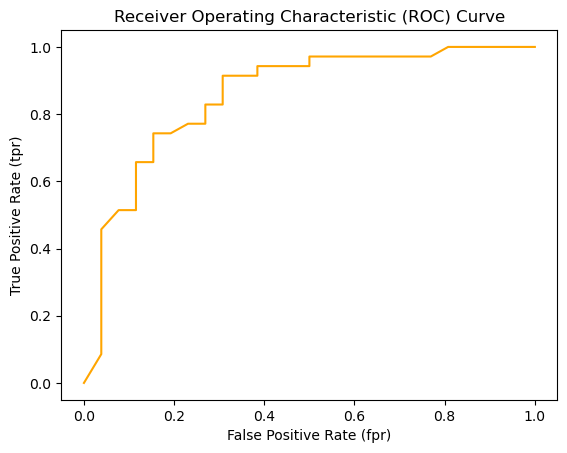

In [114]:
# create a function for ploting ROC curve

import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve give the false positive rate fpr 
    and true positive rate (tpr) of a model
    """
    
    #plot roc curve
    plt.plot(fpr,tpr,color='orange',label='ROC')
    #plot line with no predictive power (baseline)
    #plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='Guessing')
    # customise the plot
    plt.xlabel('False Positive Rate (fpr)')
    plt.ylabel('True Positive Rate (tpr)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')

plot_roc_curve(fpr,tpr)

In [115]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.8554945054945055

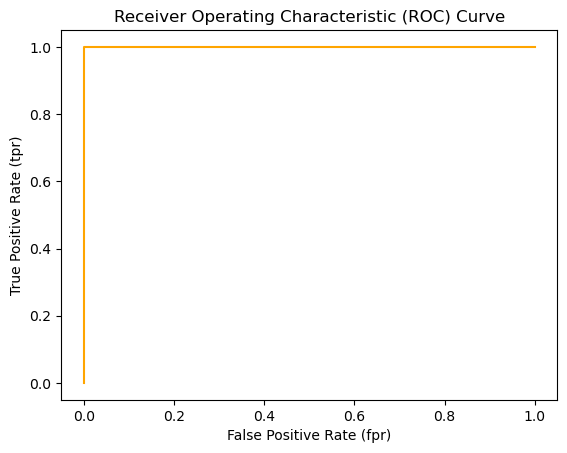

In [116]:
# plot perfect ROC curve and AUC score

fpr, tpr, thresholds = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)


In [117]:
#perfect AUC score
roc_auc_score(y_test,y_test)

1.0

Reading Extension: ROC Curve + AUC
When you first encounter them, ROC Curve and AUC (area under curve) metrics can be a little confusing. But not to worry, with a little practice, they'll start to make sense.

In a nutshell, what you should remember is:

* ROC curves and AUC metrics are evaluation metrics for binary classification models (a model which predicts one thing or another, such as heart disease or not).

* The ROC curve compares the true positive rate (tpr) versus the false positive rate (fpr) at different classification thresholds.

* The AUC metric tells you how well your model is at choosing between classes (for example, how well it is at deciding whether someone has heart disease or not). A perfect model will get an AUC score of 1.

For more information on these metrics, bookmark the following resources and refer to them when you need:

* ROC and AUC, Clearly Explained! by StatQuest - https://www.youtube.com/watch?v=4jRBRDbJemM&ab_channel=StatQuestwithJoshStarmer

* ROC documentation in Scikit-Learn (contains code examples) - https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

* How the ROC curve and AUC are calculated by Google's Machine Learning team - https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

#### 4.2.1.3 Confusion Matrix

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.
In essence, giving you an idea of where the model is getting confused. 

<img src='images/sklearn-confusion-matrix-anatomy.png'>

In [119]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)
confusion_matrix(y_test,y_preds)

array([[19,  7],
       [ 6, 29]])

In [121]:
# Visualise confusion matrix with pd.crosstab()

pd.crosstab(y_test,y_preds,rownames=['Actual Labels'],
            colnames=['Preducted Labels'])

Preducted Labels,0,1
Actual Labels,,
0,19,7
1,6,29


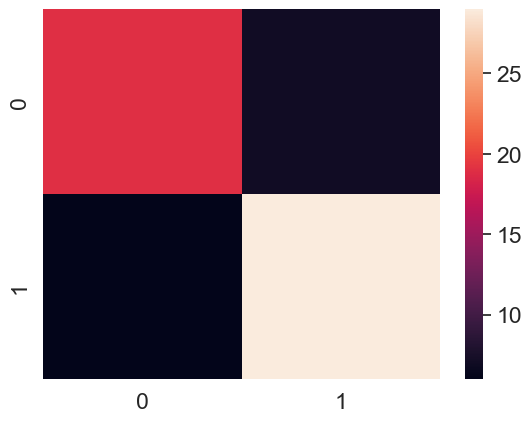

In [125]:
# Make our confusion matrix more visual with Searborn's heatmap()

import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)

# plot it using seaborn
sns.heatmap(conf_mat);

### Creating a confusion matrix using Scikit learn

To use the new methods of creating a confusion matrix with Scikit-learn. You will need
Scikit learn 1.0+

In [128]:
import sklearn
sklearn.__version__

'1.0.2'

In [129]:
clf

RandomForestClassifier()

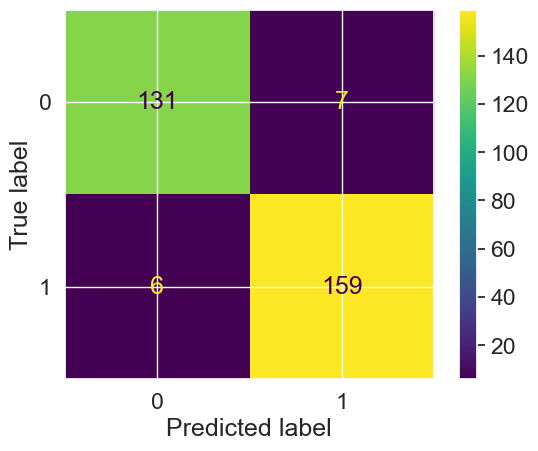

In [133]:
from sklearn.metrics import ConfusionMatrixDisplay

# plot it from the estimators on the entire dataset
ConfusionMatrixDisplay.from_estimator(estimator=clf,X=x,y=y);

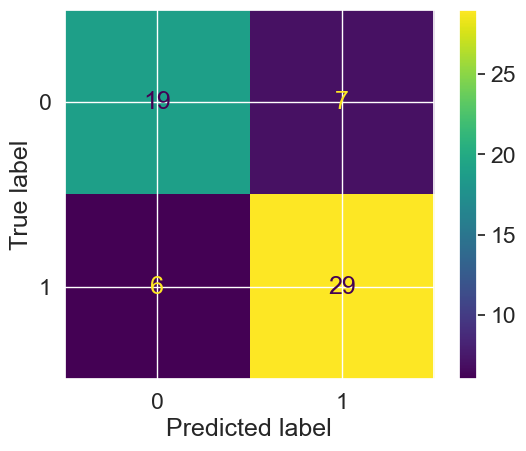

In [135]:
# plot it on the predictions only
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_preds);

#### 4.2.1.4 Classification Report

In [139]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75        26
           1       0.81      0.83      0.82        35

    accuracy                           0.79        61
   macro avg       0.78      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



<img src='images/sklearn-classification-report-anatomy.png'>

In [148]:
#### How some matrix can be deceptive 

#### Where precision and recall become valuable

# let's say we are given data about 10000 patients 
disease_true = np.zeros(10000)
# only one of the patient has the disease
disease_true[0] = 1 # only one positive case

# but the model that we created predicts every case as 0
disease_preds = np.zeros(10000) 

pd.DataFrame(classification_report(disease_true,disease_preds,output_dict=True))


## so incase of very high Class-Imbalances the accuracy is very misleading 
## - so check for other metrics well - use a wide specturm of metrics  

/Users/abhinav/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/abhinav/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/abhinav/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000
